# Imports

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functionsML_Cópia as f
from itertools import combinations
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler

# data partition
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import importlib
importlib.reload(f)



<module 'functionsML_Cópia' from 'c:\\Users\\rodba\\Documents\\GitHub\\ProjetoML\\functionsML_Cópia.py'>

**Import data sets**

In [2]:
train_db = pd.read_csv(r"C:\Users\rodba\Desktop\mestrado\aprendizagem automatica\projeto\project_data\train.csv")
test_db = pd.read_csv(r"C:\Users\rodba\Desktop\mestrado\aprendizagem automatica\projeto\project_data\test.csv")

### Data exploration

In [3]:
f.missing_values_table(train_db)

Total columns: 14
Columns with missing values: 12



,Missing Values,Percent Missing (%)
mpg,7926,10.43
tax,7904,10.40
previousOwners,1550,2.04
hasDamage,1548,2.04
paintQuality%,1524,2.01
Brand,1521,2.00
model,1517,2.00
transmission,1522,2.00
engineSize,1516,2.00
fuelType,1511,1.99


In [4]:
f.irrational_values_table(train_db)

Total numeric columns: 10
Columns with irrational values: 7
Rows with at least one irrational value: 5060



,Irrational Count,Percent Irrational (%)
tax,759,1.00
engineSize,762,1.00
mileage,755,0.99
mpg,738,0.97
previousOwners,734,0.97
paintQuality%,726,0.96
year,723,0.95
Total (rows with any irrational value),5060,6.66


**Unique Values**

In [5]:
# Loop through each column in the DataFrame
for column in train_db.columns:

    # Print unique values and count for columns with fewer than 20 unique values
    print(f"Unique values in '{column}': {train_db[column].unique()}")
    print(f"Number of unique values: {train_db[column].nunique()}\n")

#typos in every categorical variable
#different letter casing in every categorical variable
#unrealistic negative values and irrational values in every numerical category


Unique values in 'carID': [69512 53000  6366 ... 54886   860 15795]
Number of unique values: 75973

Unique values in 'Brand': ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
Number of unique values: 72

Unique values in 'model': [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'

**Correlation Matrix**

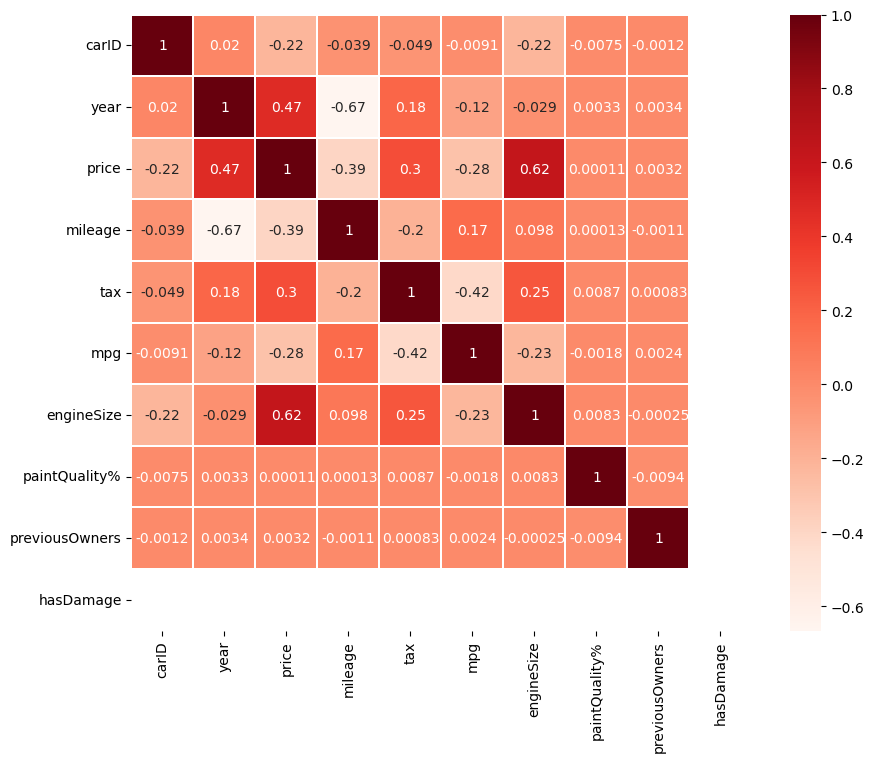

In [6]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

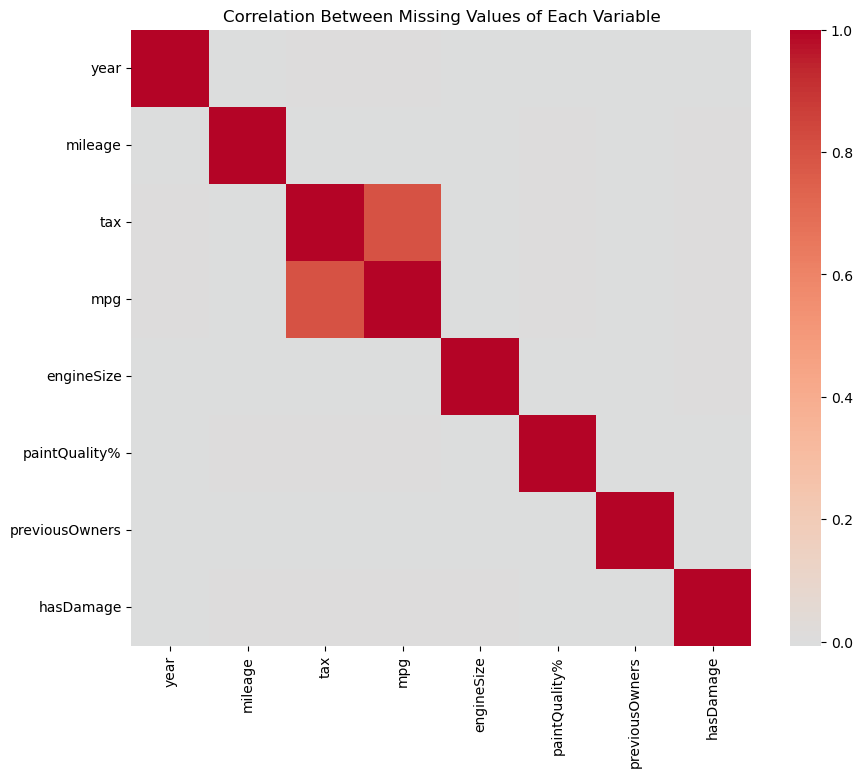

In [7]:

missing_mask = train_db.drop(columns=["carID", "price"], errors="ignore").select_dtypes(include=["number"]).isna()

missing_corr = missing_mask.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(missing_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Between Missing Values of Each Variable")
plt.show()

## Distributions & Value Counts

In [8]:
train_db["transmission"].value_counts()

transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
UNKNOWN         14
ANUAL           13
nknown          13
anua            12
SEMI-AUT        11
MANUA           11
emi-auto        10
 MANUAL          9
 Manual          7
EMI-AUTO         7
 manual          6
automati         6
AUTOMATI         6
utomati          6
Other            5
emi-Aut          5
semi-aut         4
UTOMATIC         2
manua            2
manual           1
nknow            1
Name: count, dtype: int64

## Fixing issues

In [9]:

# Drop irrelevant column
train_db = train_db.drop(columns="hasDamage")

train_db_numerical = train_db.select_dtypes(exclude=["object"]).columns
# Lowercase text columns
text_cols = train_db.select_dtypes(include=["object"]).columns
train_db[text_cols] = train_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)


# Loop and fix all categorical columns
for col in train_db.select_dtypes(include="object").columns:
    train_db = f.fix_typos(col, train_db)


In [10]:
Q1 = train_db["paintQuality%"].quantile(0.25)
Q3 = train_db["paintQuality%"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1)
print(Q3)


47.0
82.0


In [11]:
print("Outlier detection for Car dataset:")
f.IQR_outliers(train_db, train_db_numerical)

Outlier detection for Car dataset:
carID: 0 outliers
year: 1791 outliers
price: 2695 outliers
mileage: 3617 outliers
tax: 20306 outliers
mpg: 1200 outliers
engineSize: 716 outliers
paintQuality%: 0 outliers
previousOwners: 734 outliers


In [ ]:
# Criar o filtro dos casos que queres remover
filtro = (train_db['mileage'] < 2000) & (train_db['previousOwners'] > 2)

# Ver quantos carros serão removidos (opcional)
print(f"Número de carros removidos: {train_db[filtro].shape[0]}")

# Remover do DataFrame
train_db = train_db[~filtro]  # o ~ inverte o filtro (mantém o resto)

# Confirmar o novo tamanho do DataFrame
print(f"Novo tamanho do dataset: {train_db.shape[0]} linhas")



Número de carros removidos: 2136
Novo tamanho do dataset: 73837 linhas


In [13]:
def categorize_tax(df):
    """
    Transforma a variável numérica 'tax' em uma nova variável categórica 'tax_category',
    capturando a faixa Premium (100-200) que se correlaciona com carros de preço mais elevado.
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo a coluna 'tax'.
        
    Retorna:
        pd.DataFrame: O DataFrame com a nova coluna categórica 'tax_category'.
    """
    
    # 1. Definir as condições para as diferentes faixas (classes)
    conditions = [
        # Carros elétricos ou isentos (frequentemente carros mais antigos ou EV/Híbridos)
        (df['tax'] == 0),
        
        # Faixa de imposto muito baixa (carros pequenos/antigos/económicos)
        (df['tax'] > 0) & (df['tax'] < 100),
        
        # FAixa PREMIUM: Onde você observou a concentração de carros mais caros
        (df['tax'] >= 100) & (df['tax'] <= 200),
        
        # Faixa de imposto alta (muito alta emissão de CO2 ou carros novos e caros)
        (df['tax'] > 200)
    ]
    
    # 2. Definir os rótulos (nomes das classes) correspondentes
    choices = [
        'Tax_Exempt_or_Zero',       # Tax = 0
        'Tax_Low_Economy',          # 0 < Tax < 100
        'Tax_Mid_Premium_Band',     # 100 <= Tax <= 200 (Seu Insight!)
        'Tax_High_Luxury_Or_Old'    # Tax > 200
    ]
    
    # 3. Aplicar as condições e criar a nova coluna
    df['tax_category'] = np.select(conditions, choices, default='Tax_Other_Unknown')
    
    # 4. Converter explicitamente para tipo 'category' (boa prática)
    df['tax_category'] = df['tax_category'].astype('category')
    
    # Opcional: Remover a coluna numérica original 'tax' para evitar multicolinearidade
    # com o One-Hot Encoding posterior.
    df = df.drop(columns=['tax'])
    
    return df

# Exemplo de uso:
# Suponha que 'df_train' seja o seu DataFrame
# df_train_new = categorize_tax(df_train.copy())

# print(df_train_new[['tax_category']].head())

In [26]:
train_db=categorize_tax(train_db)

In [15]:
train_db[train_db['tax_category']=="Tax_High_Luxury_Or_Old"]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,tax_category
66,41358,mercedes,x-class,2018.000000,29490,automatic,5000.000000,diesel,250.000000,35.8,2.3,60.0,3.0,Tax_High_Luxury_Or_Old
184,36961,mercedes,c class,2016.000000,38349,semi-auto,22000.000000,petrol,300.000000,34.5,4.0,96.0,1.0,Tax_High_Luxury_Or_Old
193,3425,audi,q3,2013.000000,13895,automatic,42000.000000,diesel,205.000000,47.9,2.0,70.0,0.0,Tax_High_Luxury_Or_Old
202,42777,mercedes,c class,2017.000000,32995,automatic,10750.000000,petrol,260.000000,35.3,3.0,54.0,1.0,Tax_High_Luxury_Or_Old
249,35089,mercedes,e class,NaN,20849,automatic,14021.000000,diesel,326.028233,65.7,2.0,96.0,3.0,Tax_High_Luxury_Or_Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75864,18141,ford,c-max,2008.000000,1999,manual,97000.000000,petrol,235.000000,39.8,1.8,98.0,4.0,Tax_High_Luxury_Or_Old
75878,35222,mercedes,gle class,2016.000000,26295,semi-auto,27595.000000,diesel,260.000000,NaN,3.0,65.0,3.0,Tax_High_Luxury_Or_Old
75883,52251,toyota,hilux,2018.000000,22498,manual,-39765.602338,NaN,265.000000,40.4,2.4,88.0,3.0,Tax_High_Luxury_Or_Old
75904,8571,bmw,x5,2009.816757,20450,automatic,89000.000000,diesel,205.000000,45.6,3.0,54.0,3.0,Tax_High_Luxury_Or_Old


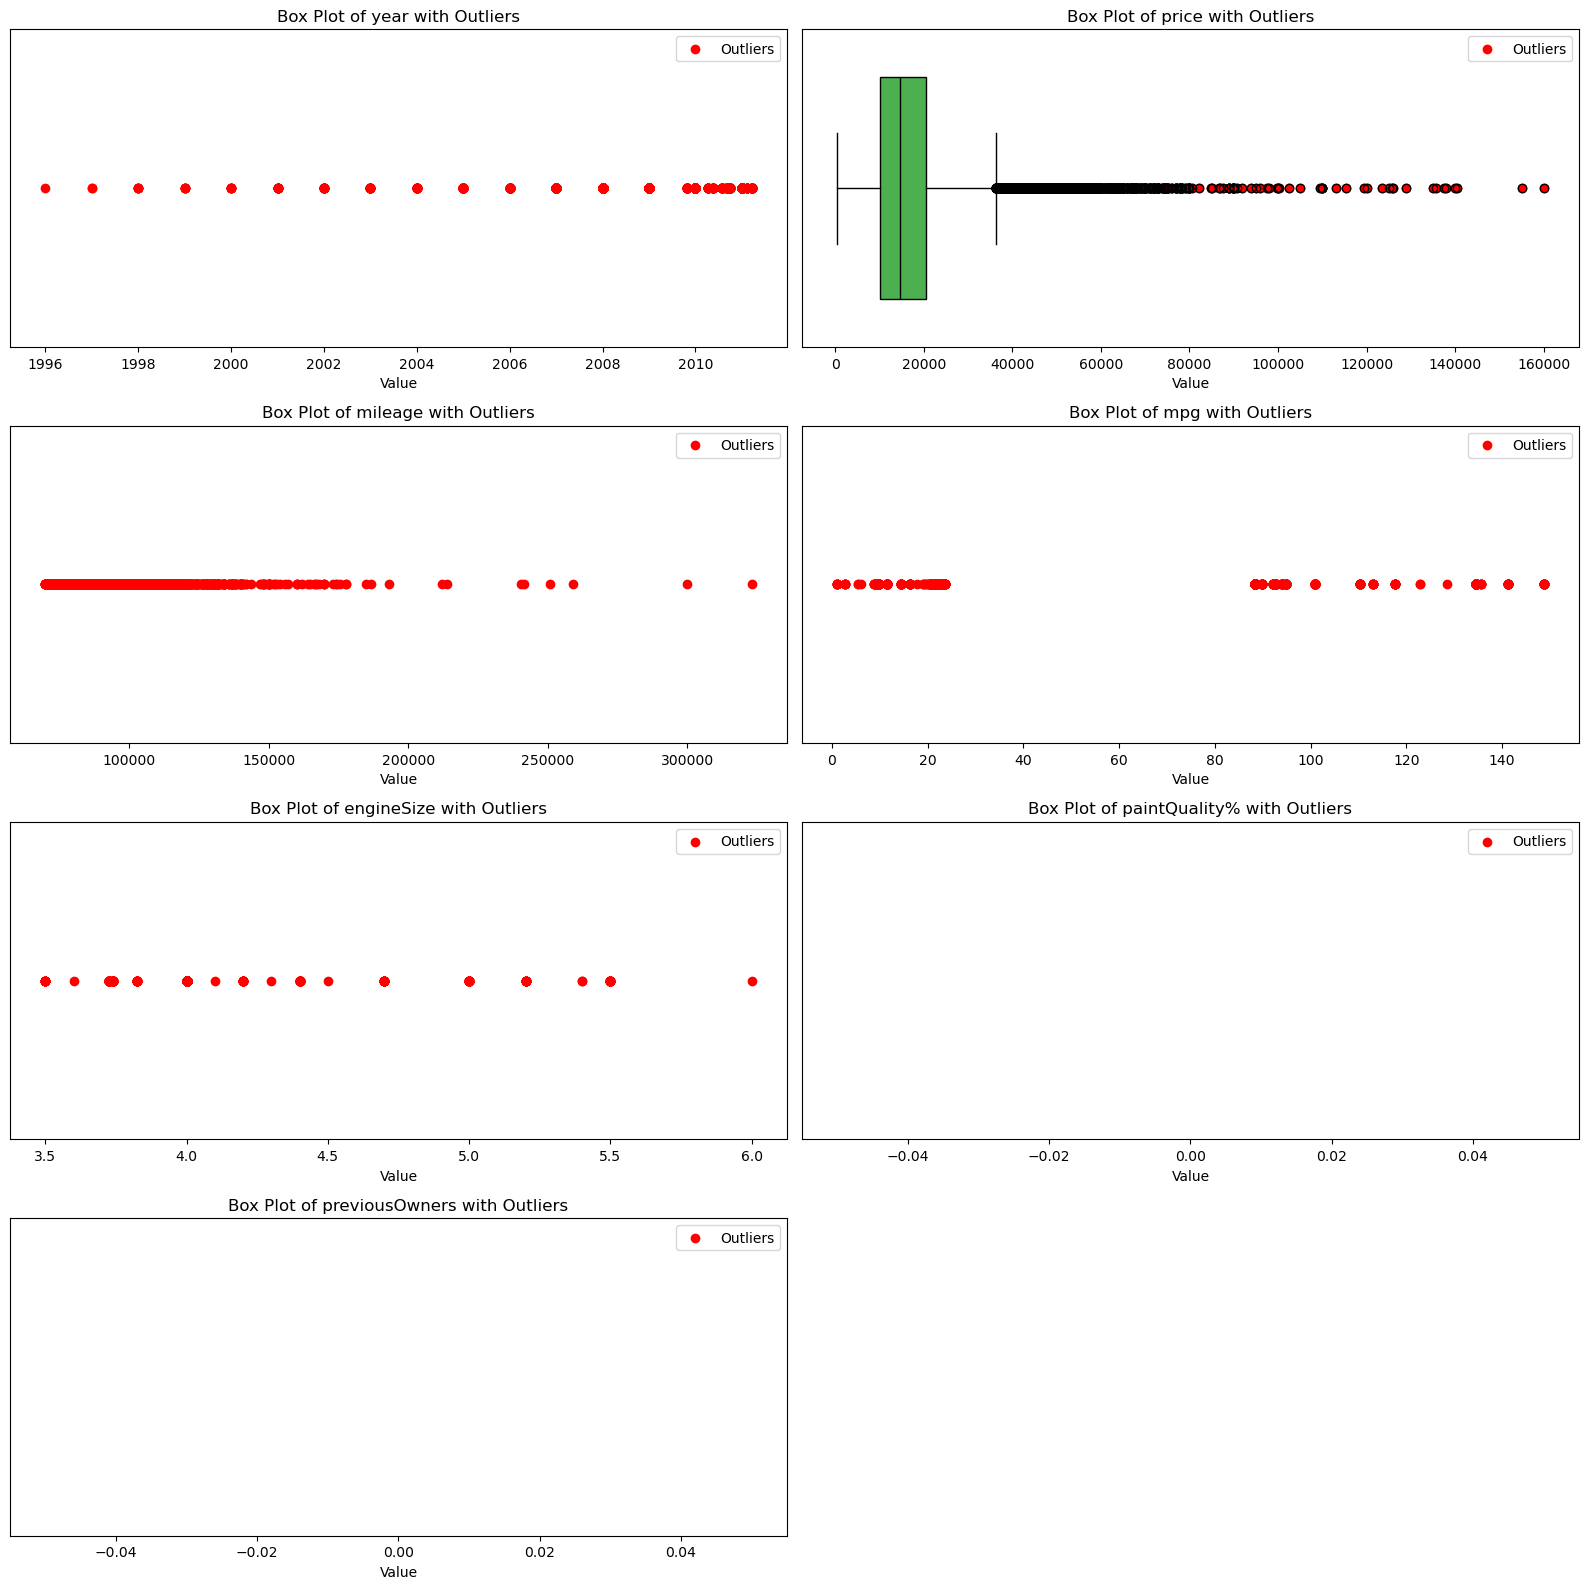

In [ ]:
numerical_cols_to_plot = [
    col for col in train_db.columns 
    if pd.api.types.is_numeric_dtype(train_db[col]) and col != 'carID'
]

# (Opcional) Remova explicitamente colunas que você sabe que foram transformadas
# (Embora o filtro is_numeric_dtype já deva cuidar disso)
if 'tax' in numerical_cols_to_plot:
     numerical_cols_to_plot.remove('tax') 


# 3. Chamar a função com a lista de colunas numéricas corrigida
# Agora, esta lista deve conter apenas colunas numéricas (mileage, mpg, price, etc.)
# e excluir 'tax_category', resolvendo o erro TypeError.

# Nota: O uso de train_db.dropna() pode remover muitas linhas,
# assegure-se de que a imputação de missing values foi feita antes.
f.plot_multiple_boxes_with_outliers(train_db, numerical_cols_to_plot)

In [20]:
# Apply filtering rules to training data
train_db.loc[train_db["mileage"] < 0, "mileage"] = np.nan
train_db.loc[train_db["tax"] < 0, "tax"] = np.nan
train_db.loc[~train_db["mpg"].between(0, 150), "mpg"] = np.nan
train_db.loc[~train_db["engineSize"].between(1, 6), "engineSize"] = np.nan
train_db.loc[train_db["paintQuality%"] > 100, "paintQuality%"] = np.nan
train_db.loc[~train_db["year"].between(1990, 2020), "year"] = np.nan
train_db.loc[~train_db["previousOwners"].between(0, 4), "previousOwners"] = np.nan


In [21]:
(train_db["engineSize"]<1).value_counts()

engineSize
False    73837
Name: count, dtype: int64

TypeError: Unordered Categoricals can only compare equality or not

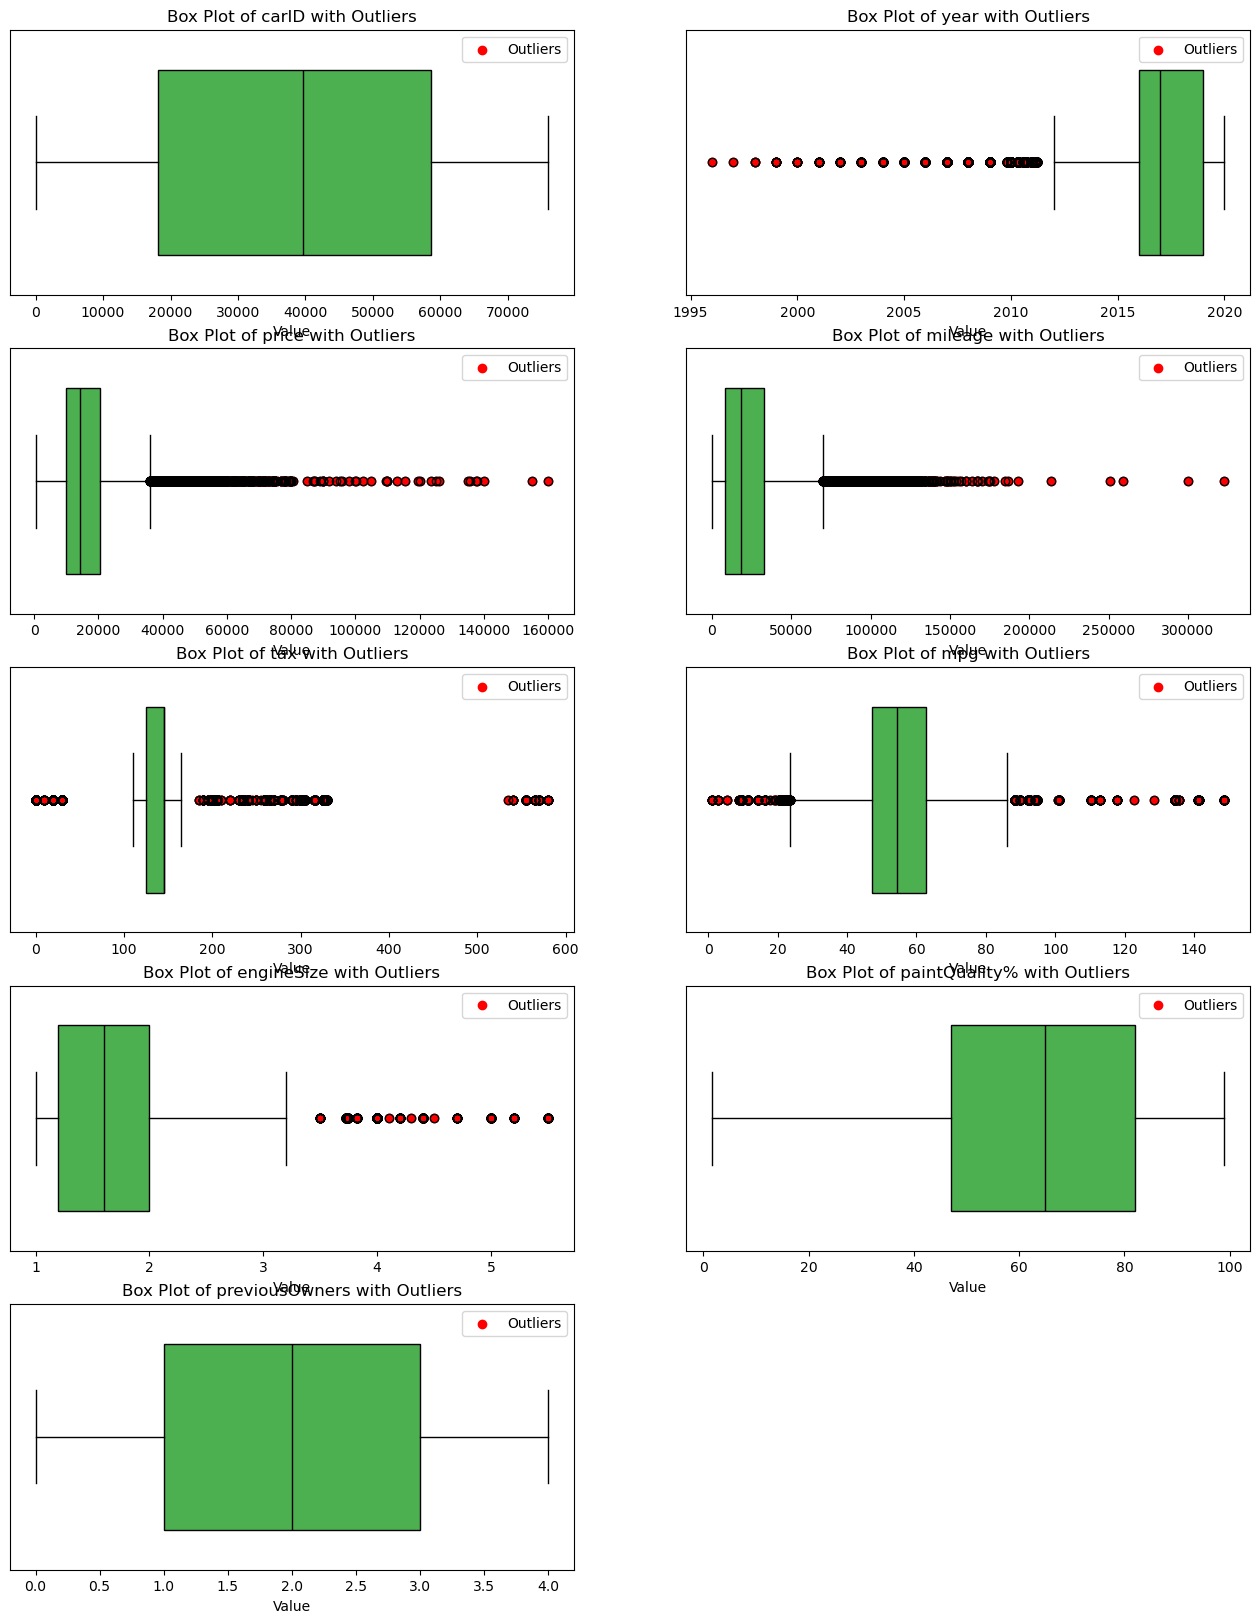

In [22]:
f.plot_multiple_boxes_with_outliers(train_db.dropna(), train_db_numerical)

In [ ]:
# Filter and display all rows where tax > 500
high_tax_entries = train_db[train_db['tax'] > 500]
high_tax_entries

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,tax_category
795,2522,audi,sq7,2009.0,8995,automatic,136000.0,NaN,540.0,31.0,3.000000,66.0,1.0,Tax_High_Luxury_Or_Old
3046,24745,ford,mustang,2017.0,28000,semi-auto,23179.0,petrol,570.0,23.5,5.000000,63.0,1.0,Tax_High_Luxury_Or_Old
3812,12545,bmw,x5,2011.0,15980,automatic,46000.0,petrol,570.0,22.6,4.400000,80.0,3.0,Tax_High_Luxury_Or_Old
3954,42387,mercedes,m class,2011.0,7995,automatic,131000.0,diesel,555.0,31.0,3.723712,65.0,3.0,Tax_High_Luxury_Or_Old
4784,13600,bmw,6 series,2006.0,4999,automatic,126054.0,petrol,555.0,29.7,3.000000,80.0,2.0,Tax_High_Luxury_Or_Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74462,56446,opel,antara,2007.0,2999,automatic,99500.0,diesel,565.0,32.8,2.000000,87.0,3.0,Tax_High_Luxury_Or_Old
74756,12984,bmw,m5,2015.0,29795,automatic,28500.0,petrol,565.0,28.5,4.400000,89.0,1.0,Tax_High_Luxury_Or_Old
74824,44623,mercedes,m class,2011.0,10990,automatic,69000.0,diesel,555.0,32.5,3.000000,69.0,3.0,Tax_High_Luxury_Or_Old
75225,3596,audi,rs6,2014.0,44491,automatic,43752.0,petrol,555.0,28.8,4.000000,71.0,3.0,Tax_High_Luxury_Or_Old


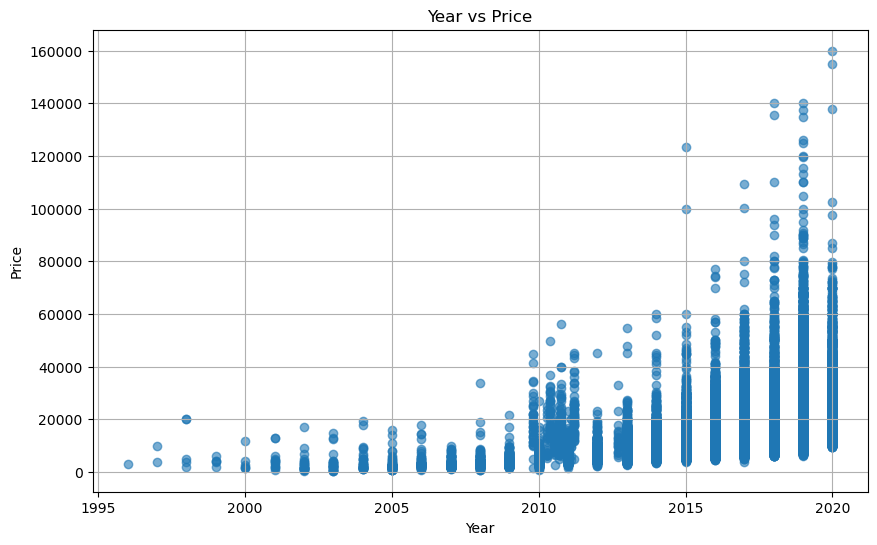

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_db['year'], train_db['price'], alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.grid(True)
plt.show()


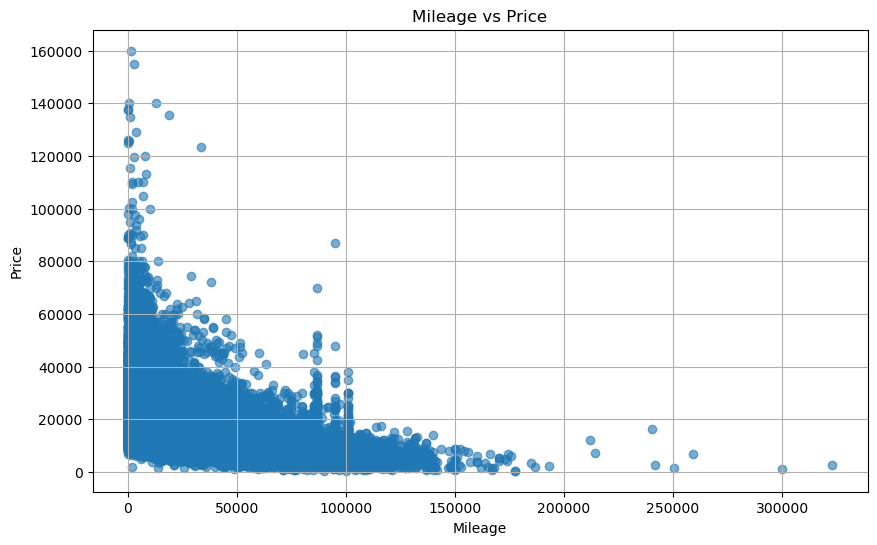

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_db['mileage'], train_db['price'], alpha=0.6)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.grid(True)
plt.show()


In [ ]:
train_db[train_db['mileage']==0]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,tax_category


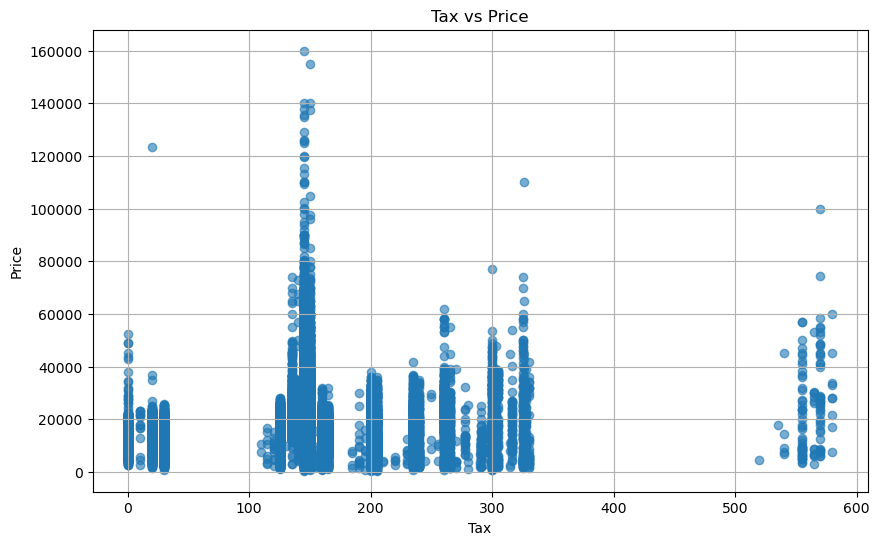

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_db['tax'], train_db['price'], alpha=0.6)
plt.xlabel('Tax')
plt.ylabel('Price')
plt.title('Tax vs Price')
plt.grid(True)
plt.show()



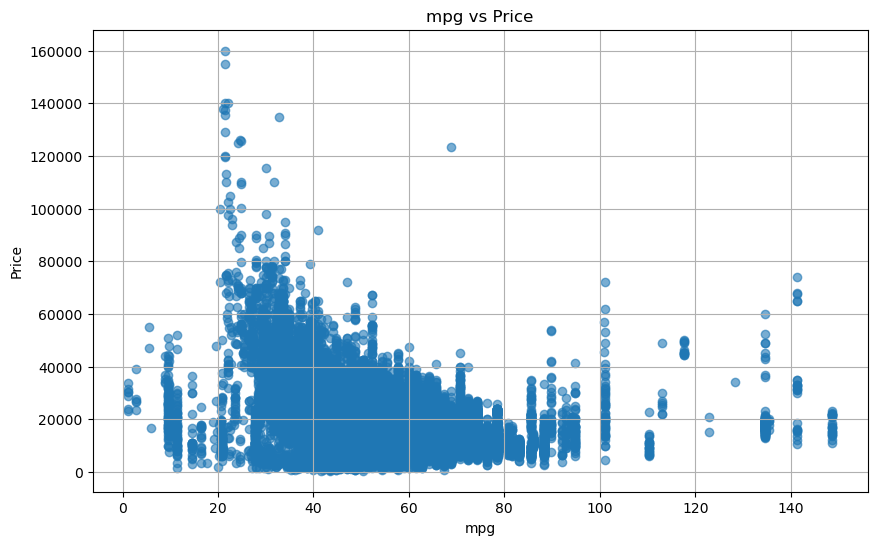

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_db['mpg'], train_db['price'], alpha=0.6)
plt.xlabel('mpg')
plt.ylabel('Price')
plt.title('mpg vs Price')
plt.grid(True)
plt.show()


NORMALIZACAO


In [ ]:
train_db['price'] = np.log1p(train_db['price'])
train_db['mileage'] = np.log1p(train_db['mileage'])
train_db['mpg'] = np.log1p(train_db['mpg'])

lower, upper = train_db['tax'].quantile([0.01, 0.99])
train_db['tax'] = train_db['tax'].clip(lower, upper)
train_db['tax'] = np.log1p(train_db['tax'])

lower_es, upper_es = train_db['engineSize'].quantile([0.01, 0.99])
train_db['engineSize'] = train_db['engineSize'].clip(lower, upper)

# Save these values from your TRAIN data preprocessing
train_thresholds = {
    'tax_lower': lower,           # The 'lower' from train_db['tax'].quantile([0.01, 0.99])
    'tax_upper': upper,           # The 'upper' from train_db['tax'].quantile([0.01, 0.99])
    'engineSize_lower': lower_es, # The 'lower' from train_db['engineSize'].quantile([0.01, 0.99])  
    'engineSize_upper': upper_es  # The 'upper' from train_db['engineSize'].quantile([0.01, 0.99])
}


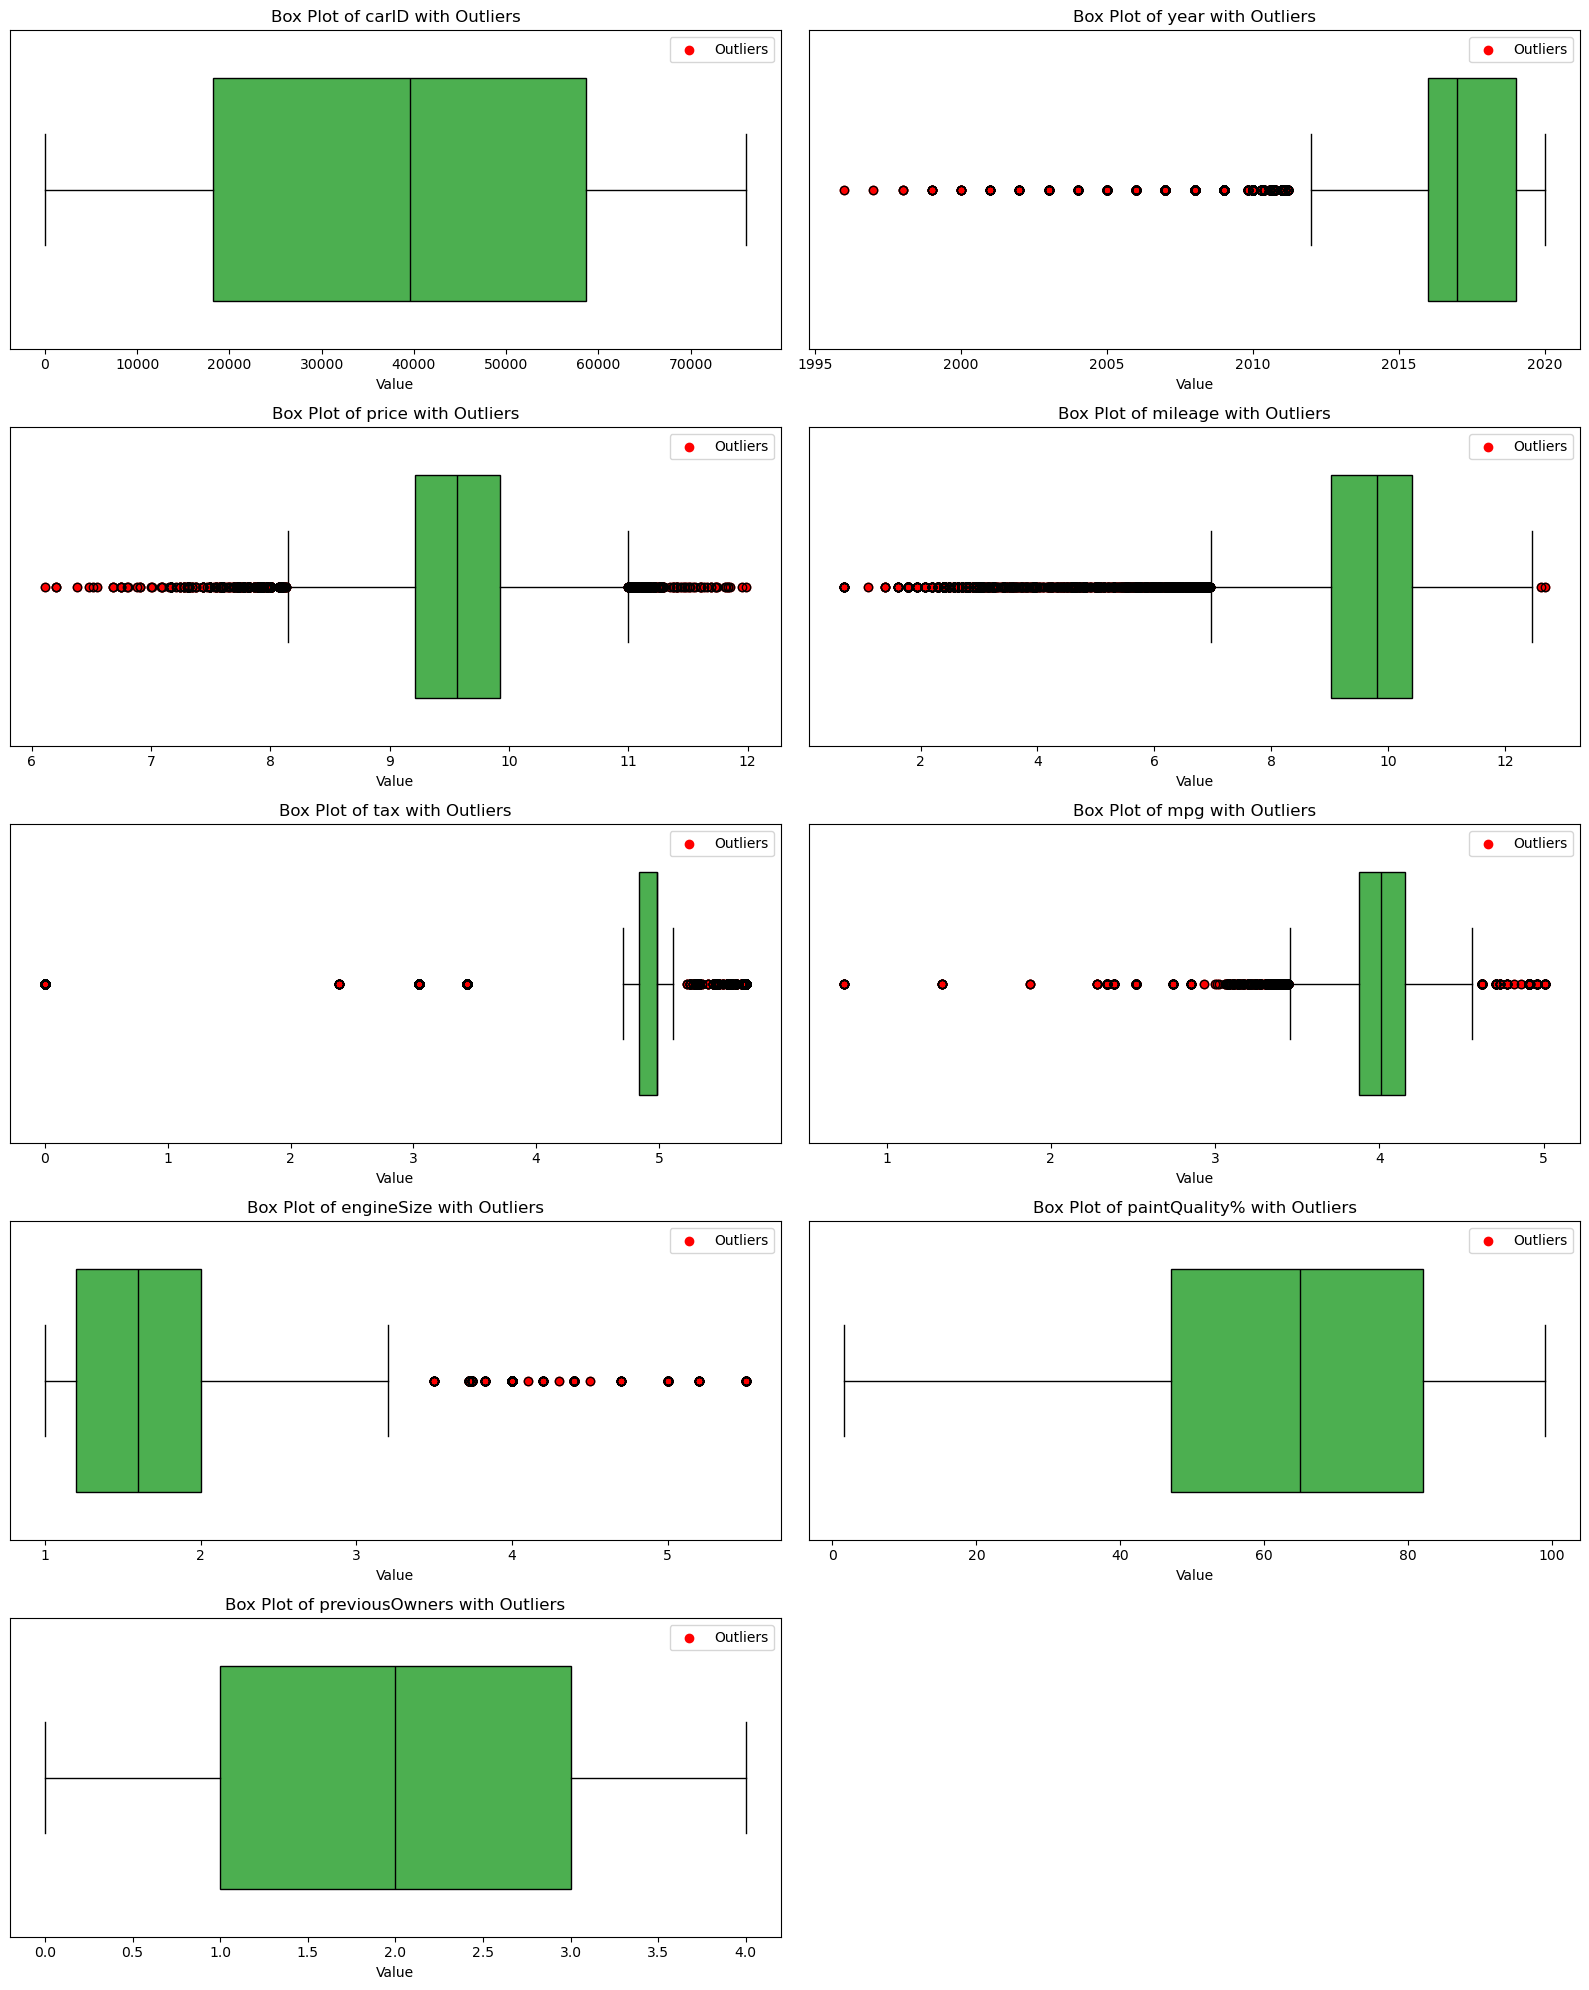

In [ ]:
f.plot_multiple_boxes_with_outliers(train_db.dropna(), train_db_numerical)

In [ ]:
train_db["paintQuality%"].value_counts()

paintQuality%
34.000000    1113
94.000000    1095
54.000000    1083
88.000000    1074
82.000000    1071
             ... 
3.140370       40
3.115295       32
2.725153       20
1.638913       19
3.254760       15
Name: count, Length: 79, dtype: int64

In [ ]:
train_db.shape[0]

73837

In [ ]:
# Criar o filtro dos casos que queres remover
filtro = (train_db['mileage'] < 4000) & (train_db['previousOwners'] > 3)

# Ver quantos carros serão removidos (opcional)
print(f"Número de carros removidos: {train_db[filtro].shape[0]}")

# Remover do DataFrame
train_db = train_db[~filtro]  # o ~ inverte o filtro (mantém o resto)

# Confirmar o novo tamanho do DataFrame
print(f"Novo tamanho do dataset: {train_db.shape[0]} linhas")



Número de carros removidos: 12402
Novo tamanho do dataset: 61435 linhas


In [ ]:
# Select all nominal columns
nominal_cols = train_db.select_dtypes(include='object').columns

# Compute Cramér's V between all pairs
for i, col1 in enumerate(nominal_cols):
    for col2 in nominal_cols[i+1:]:
        v = f.cramers_v(train_db[col1], train_db[col2])
        print(f"Cramér's V between {col1} and {col2}: {v:.3f}")


Cramér's V between Brand and model: 0.995
Cramér's V between Brand and transmission: 0.299
Cramér's V between Brand and fuelType: 0.282
Cramér's V between model and transmission: 0.364
Cramér's V between model and fuelType: 0.499
Cramér's V between transmission and fuelType: 0.203


In [ ]:


num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(include=['object', 'category']).columns

# Try single and multi-column combinations up to this size
max_combo_size = 4 

print("\nTheil’s U directionally for Categorical Variables:")
for target in cat_cols:
    u_scores = {}
    
    for combo_size in range(1, max_combo_size + 1):
        for combo in combinations([c for c in cat_cols if c != target], combo_size):
            # Build a joint predictor variable by concatenating category values
            joint_name = " + ".join(combo)
            joint_var = train_db[list(combo)].astype(str).agg("_".join, axis=1)
            
            # Directional association: how much knowing combo tells about target
            u = f.theils_u(train_db[target], joint_var)
            u_scores[joint_name] = u

    # pick top combinations that best explain target
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"\nFor categorical column '{target}', best predictors:")
    for combo, u in top3:
        print(f"  U({target} | {combo}) = {u:.3f}")



Theil’s U directionally for Categorical Variables:

For categorical column 'Brand', best predictors:
  U(Brand | model + transmission + fuelType + tax_category) = 0.984
  U(Brand | model + transmission + tax_category) = 0.982
  U(Brand | model + transmission + fuelType) = 0.982
  U(Brand | model + transmission) = 0.980
  U(Brand | model + fuelType + tax_category) = 0.980
  U(Brand | model + fuelType) = 0.978
  U(Brand | model + tax_category) = 0.978
  U(Brand | model) = 0.976
  U(Brand | transmission + fuelType + tax_category) = 0.187
  U(Brand | transmission + tax_category) = 0.142

For categorical column 'model', best predictors:
  U(model | Brand + transmission + fuelType + tax_category) = 0.622
  U(model | Brand + fuelType + tax_category) = 0.598
  U(model | Brand + transmission + tax_category) = 0.571
  U(model | Brand + transmission + fuelType) = 0.563
  U(model | Brand + tax_category) = 0.543
  U(model | Brand + fuelType) = 0.538
  U(model | Brand + transmission) = 0.520
  U(mo

In [ ]:

from itertools import combinations
def correlation_ratio(categories, values):
    df = pd.DataFrame({'cat': categories, 'val': values}).dropna()
    if df.empty:
        return 0.0
    group_stats = df.groupby('cat')['val'].agg(['mean', 'size'])
    overall_mean = df['val'].mean()
    num = (group_stats['size'] * (group_stats['mean'] - overall_mean) ** 2).sum()
    den = ((df['val'] - overall_mean) ** 2).sum()
    return np.sqrt(num / den) if den > 0 else 0.0

# Separate numeric and categorical columns
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(exclude='number').columns

for target in num_cols:
    scores = {}

    for num_paired in range(1, 3):
        # Numeric predictor combinations
        for combo in combinations([c for c in num_cols if c != target], num_paired):
            df = train_db[list(combo) + [target]].dropna()
            if df.empty:
                continue
            model = LinearRegression().fit(df[list(combo)], df[target])
            scores[combo] = model.score(df[list(combo)], df[target])

        # Categorical predictor combinations
        for cat_pair in combinations(cat_cols, num_paired):
            combined = train_db[list(cat_pair)].astype(str).agg('_'.join, axis=1)
            scores[cat_pair] = correlation_ratio(combined, train_db[target]) ** 2


    # --- Mixed numeric + categorical pairs  ---
    for num_col in [c for c in num_cols if c != target]:
        for cat_col in cat_cols:
            df = train_db[[num_col, cat_col, target]].dropna()
            if df.empty:
                continue
            # Discretize numeric variable into bins and combine with categorical
            numeric_bins = pd.cut(df[num_col], bins=15, duplicates='drop').astype(str)
            combined = df[cat_col].astype(str) + "_" + numeric_bins
            scores[(num_col, cat_col)] = correlation_ratio(combined, df[target]) ** 2

    # --- Top 3 helpers ---
    top3 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nFor numerical column '{target}', top helpers (R² or η²):")
    for combo, score in top3:
        print(f" {combo} => {score:.3f}")



For numerical column 'year', top helpers (R² or η²):
 ('mileage', 'model') => 0.580
 ('mileage', 'tax_category') => 0.572
 ('mileage', 'fuelType') => 0.513

For numerical column 'mileage', top helpers (R² or η²):
 ('year', 'model') => 0.496
 ('year', 'Brand') => 0.459
 ('year', 'fuelType') => 0.458

For numerical column 'tax', top helpers (R² or η²):
 ('model', 'tax_category') => 0.996
 ('mpg', 'tax_category') => 0.994
 ('Brand', 'tax_category') => 0.994

For numerical column 'mpg', top helpers (R² or η²):
 ('model', 'fuelType') => 0.557
 ('tax', 'model') => 0.495
 ('model', 'tax_category') => 0.450

For numerical column 'engineSize', top helpers (R² or η²):
 ('mpg', 'model') => 0.792
 ('tax', 'model') => 0.722
 ('model', 'fuelType') => 0.706

For numerical column 'paintQuality%', top helpers (R² or η²):
 ('mileage', 'model') => 0.026
 ('year', 'model') => 0.017
 ('mpg', 'model') => 0.012

For numerical column 'previousOwners', top helpers (R² or η²):
 ('paintQuality%', 'model') => 0.

### -----POR DAR CLEAN UP-----

In [ ]:
# Safely convert previousOwners and year to nullable integers
train_db["previousOwners"] = pd.to_numeric(train_db["previousOwners"], errors='coerce').round().astype("Int64")
train_db["year"] = pd.to_numeric(train_db["year"], errors='coerce').round().astype("Int64")

# Handle Brand for i3
idx_to_drop = train_db[(train_db['model'] == 'i3') & (train_db['Brand'].isna())].index
train_db = train_db.drop(idx_to_drop)

# Fill categorical columns
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission"])
train_db = f.fill_NaN_with_categorical(train_db, "mpg", ["model","fuelType"])
train_db["transmission"] = train_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
train_db["fuelType"] = train_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
train_db = f.fill_NaN_with_mixed(train_db, "year", "model", "mileage")
train_db = f.fill_NaN_with_mixed(train_db, "mileage", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "tax", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "engineSize", "model", "tax")

# Fill numeric columns with median
train_db["paintQuality%"] = train_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
train_db["previousOwners"] = train_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

# Drop any remaining NaNs
train_db = train_db.dropna()


c:\Users\rodba\Documents\GitHub\ProjetoML\functionsML_Cópia.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, dropna=False, group_keys=False ).apply(fill_group_cat, target_col)
c:\Users\rodba\Documents\GitHub\ProjetoML\functionsML_Cópia.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, dropna=False, group_keys=False ).apply(fill_group_cat, 

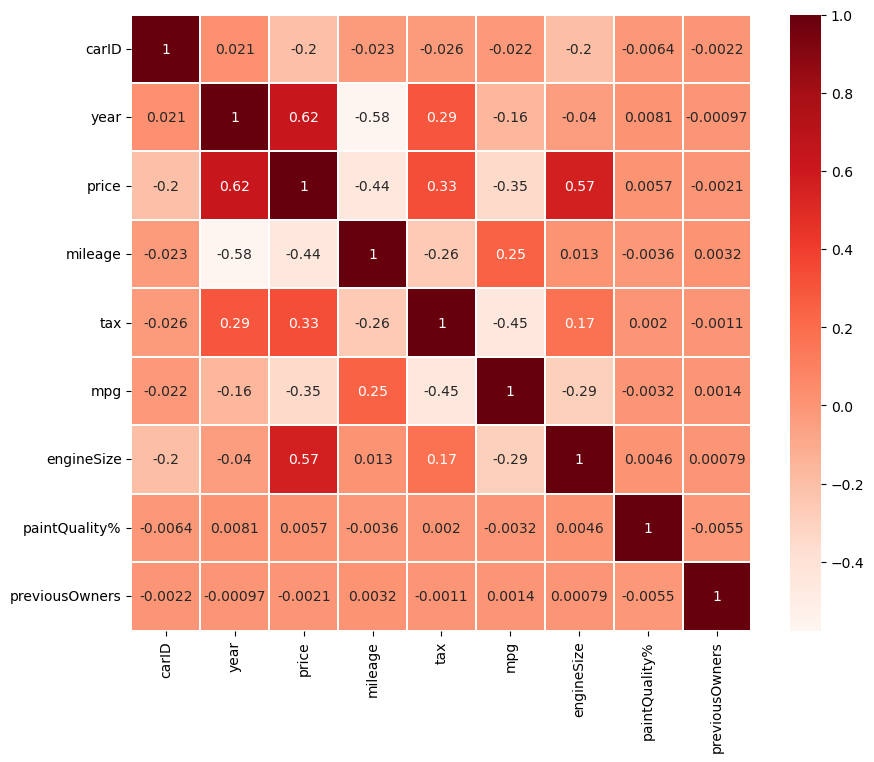

In [ ]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

meter grupos a numerica tax !!!!!!!

In [ ]:
one_hot = pd.get_dummies(train_db["Brand"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot], axis=1)

train_db['transmission'] = train_db['transmission'].replace('other', 'unknown')

one_hot2 = pd.get_dummies(train_db["transmission"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot2], axis=1)

train_db["fuelType"] = train_db["fuelType"].replace('other', 'electric')

one_hot3 = pd.get_dummies(train_db["fuelType"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot3], axis=1)

one_hot4 = pd.get_dummies(train_db["tax_category"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot4], axis=1)



In [ ]:
"""for col in ["manual", "semi-auto", "unknown","hybrid"]:
    print(train_db[col].value_counts())"""

'for col in ["manual", "semi-auto", "unknown","hybrid"]:\n    print(train_db[col].value_counts())'

In [ ]:
# Compute mean Price for each model
target_mean = train_db.groupby('model')['price'].mean()

# Map the mean back to a new column
train_db['model_encoded'] = train_db['model'].map(target_mean)

print(train_db[['model', 'price', 'model_encoded']].head(100))

        model  price  model_encoded
1       yaris    9.5       9.225233
3      fiesta    9.4       9.190323
4    2 series   10.0       9.840401
5    3 series    9.0       9.790036
9       focus    9.6       9.462646
..        ...    ...            ...
120     focus    9.6       9.462646
121      polo    9.5       9.297366
122       i30    9.6       9.267427
123      ix35    9.9       9.932581
124     yaris    9.3       9.225233

[100 rows x 3 columns]


In [ ]:
X = train_db.drop(columns=["price","carID"])
y = train_db["price"]
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)

In [ ]:
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)

# repeat for val

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

In [ ]:
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


#show results
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,bmw,ford,hyundai,...,skoda,toyota,vw,manual,semi-auto,unknown,electric,hybrid,petrol,model_encoded
20446,0.708333,0.858333,0.526316,0.790698,0.08,0.948665,0.25,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.551325
47747,0.833333,0.800000,0.526316,0.837209,0.12,0.322382,0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.442054
24068,0.875000,0.775000,0.000000,0.720930,0.08,0.301848,0.75,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.541253
45624,0.875000,0.758333,0.877193,0.720930,0.20,0.579055,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.632084
10239,1.000000,0.141667,0.877193,0.767442,0.04,0.784394,0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.442054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56619,1.000000,0.516667,0.877193,0.697674,0.38,0.537988,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649606
64704,0.833333,0.750000,0.596491,0.813953,0.22,0.702259,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.590021
52569,0.958333,0.150000,0.877193,0.720930,0.04,0.979466,0.75,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.366709
53757,0.916667,0.716667,0.877193,0.813953,0.22,0.496920,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.632667


In [ ]:
for var in X_train_cat:
    f.TestCorrelationRatio(X_train_cat[var],y_train, var)

Brand is IMPORTANT for prediction (η = 0.563)
model is IMPORTANT for prediction (η = 0.751)
transmission is IMPORTANT for prediction (η = 0.566)
fuelType is IMPORTANT for prediction (η = 0.250)
tax_category is IMPORTANT for prediction (η = 0.206)


c:\Users\rodba\Documents\GitHub\ProjetoML\functionsML_Cópia.py:372: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('cat')['val'].mean()
c:\Users\rodba\Documents\GitHub\ProjetoML\functionsML_Cópia.py:374: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_per_cat = df.groupby('cat').size()


In [ ]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 20
Score with 20 features: 0.891310


In [ ]:
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 21)

train_db_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
X_train_num_scaled.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'bmw', 'ford', 'hyundai', 'mercedes', 'opel', 'skoda',
       'toyota', 'vw', 'manual', 'semi-auto', 'unknown', 'electric', 'hybrid',
       'petrol', 'model_encoded'],
      dtype='object')

In [ ]:
rfe.ranking_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

year               True
mileage            True
tax                True
mpg                True
engineSize         True
paintQuality%     False
previousOwners     True
bmw                True
ford               True
hyundai            True
mercedes           True
opel               True
skoda              True
toyota             True
vw                 True
manual             True
semi-auto          True
unknown            True
electric           True
hybrid             True
petrol             True
model_encoded      True
dtype: bool

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV()


reg.fit(X_train_num_scaled, y_train)

coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 21 variables and eliminated the other 1 variables


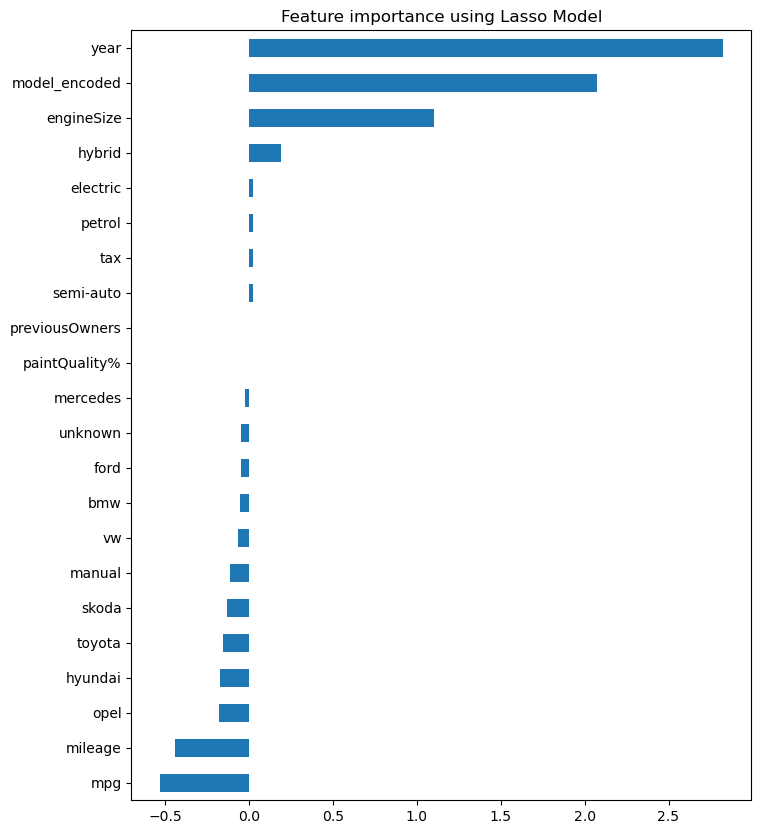

In [ ]:
plot_importance(coef,'Lasso')

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR| Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |---|
| year | Keep? | Keep | Keep | Include in the model |
| engineSize | Keep | Keep |Keep| Include in the model |
| tax | Keep?| Keep | Discard | Try with and without |
| previousOwners | Keep? | Discard | Discard | Discard |
| paintQuality% | Keep? | Discard | Discard | Discard |
| mpg | Keep? | Keep | Keep? | Try with and without |
| mileage | Keep | Keep | Keep | Keep |

<hr>


### Categorical Data

| Predictor | Correlation Ratio | 
| --- | --- | 
| Brand | Keep |  
|  model | Keep | 
| transmission | Keep |
| fuelType| Keep? |


<hr>



In [23]:
X_train_num_scaled = X_train_num_scaled.drop(columns=['previousOwners', "paintQuality%"])

X_val_num_scaled = X_val_num_scaled.drop(columns=['previousOwners', "paintQuality%"])

NameError: name 'X_train_num_scaled' is not defined

In [24]:
# 3. Fit model
model = LinearRegression()
model.fit(X_train_num_scaled, y_train)

# 4. Predict
y_pred = model.predict(X_val_num_scaled)

# 5. Evaluate
print(f"R²: {r2_score(y_val, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred)):.2f}")

NameError: name 'X_train_num_scaled' is not defined

In [ ]:
# Drop irrelevant column
test_db = test_db.drop(columns="hasDamage")

# Lowercase text columns
text_cols = test_db.select_dtypes(include=["object"]).columns
test_db[text_cols] = test_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)

# Loop and fix all categorical columns (if your fix_typos function works for test set)
for col in test_db.select_dtypes(include="object").columns:
    test_db = f.fix_typos(col, test_db)

# Apply the same filtering rules
test_db.loc[test_db["mileage"] < 0, "mileage"] = np.nan
test_db.loc[test_db["tax"] < 0, "tax"] = np.nan
test_db.loc[~test_db["mpg"].between(0, 150), "mpg"] = np.nan
test_db.loc[~test_db["engineSize"].between(1, 6), "engineSize"] = np.nan
test_db.loc[test_db["paintQuality%"] > 100, "paintQuality%"] = np.nan
test_db.loc[~test_db["year"].between(1990, 2020), "year"] = np.nan
test_db.loc[~test_db["previousOwners"].between(0, 4), "previousOwners"] = np.nan

# Apply the same transformations
test_db['mileage'] = np.log1p(test_db['mileage'])
test_db['mpg'] = np.log1p(test_db['mpg'])

# Use the SAME clipping bounds from training data
test_db['tax'] = test_db['tax'].clip(train_thresholds['tax_lower'], train_thresholds['tax_upper'])
test_db['tax'] = np.log1p(test_db['tax'])

# Use the SAME clipping bounds from training data  
test_db['engineSize'] = test_db['engineSize'].clip(train_thresholds['engineSize_lower'], train_thresholds['engineSize_upper'])

# Rounding future Int values
test_db.loc[:, "year"] = test_db["year"].round()

# Remove negative/irrational previousOwners
test_db.loc[(test_db['previousOwners'] < 0) | (test_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan

# Round floats to 1 digit
for col in test_db.select_dtypes(include="float64").columns:
    test_db[col] = test_db[col].round(1)

# Remove paintQuality% above 100
test_db.loc[test_db["paintQuality%"] > 100, "paintQuality%"] = np.nan

# Remove negative values from numeric columns
for col in test_db.select_dtypes(include="float64").columns:
    test_db = f.negative_to_nan_columns(col, test_db)

# Safely convert previousOwners and year to nullable integers
test_db["previousOwners"] = pd.to_numeric(test_db["previousOwners"], errors='coerce').round().astype("Int64")
test_db["year"] = pd.to_numeric(test_db["year"], errors='coerce').round().astype("Int64")

# Fill categorical columns using the same functions as training
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "mpg", ["model","fuelType"])
test_db["transmission"] = test_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test_db["fuelType"] = test_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
test_db = f.fill_NaN_with_mixed(test_db, "year", "model", "mileage")
test_db = f.fill_NaN_with_mixed(test_db, "mileage", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "tax", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "engineSize", "model", "tax")

# Fill numeric columns with median
test_db["paintQuality%"] = test_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
test_db["previousOwners"] = test_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

numeric_cols = test_db.select_dtypes(include=["number"]).columns.drop("carID", errors='ignore')

for col in numeric_cols:
    # Convert to float to safely handle NaNs and group means
    test_db[col] = test_db[col].astype(float)
    
    # Compute model mean
    category_means = test_db.groupby("model")[col].transform('mean')
    
    # Fill NaNs with category mean
    test_db[col] = test_db[col].fillna(category_means)
    
    # Fill any remaining NaNs with global mean
    global_mean = test_db[col].mean()
    test_db[col] = test_db[col].fillna(global_mean)
    
    # Optional: convert back to integer if column was originally integer
    if "Int64" in str(test_db[col].dtype):
        test_db[col] = test_db[col].round().astype("Int64")



        
# One-hot encode categorical columns
brand_dummies = pd.get_dummies(test_db["Brand"], drop_first=True).astype(int)
test_db = pd.concat([test_db, brand_dummies], axis=1)

# Merge rare transmission values
test_db['transmission'] = test_db['transmission'].replace('other', 'unknown')
transmission_dummies = pd.get_dummies(test_db["transmission"], drop_first=True).astype(int)
test_db = pd.concat([test_db, transmission_dummies], axis=1)

# Merge rare fuelType values
test_db["fuelType"] = test_db["fuelType"].replace('other', 'electric')
fuel_dummies = pd.get_dummies(test_db["fuelType"], drop_first=True).astype(int)
test_db = pd.concat([test_db, fuel_dummies], axis=1)


# Create mapping dictionary from train_df
mapping = train_db.set_index("model")["model_encoded"].to_dict()

# Compute global mean in case test has unseen models
global_mean = train_db["model_encoded"].mean()

# Map test_df model to encoded value; unseen models get global_mean
test_db["model_encoded"] = test_db["model"].map(mapping).fillna(global_mean)

# Prepare features (exclude price and ID if present)
X_test = test_db.drop(columns=["carID"], errors='ignore')  # ignore if price not in test
X_test_num = X_test.select_dtypes(include=np.number).set_index(X_test.index)

# Scale using the same scaler fitted on training data
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test.index)

X_test_num_scaled = X_test_num_scaled.drop(columns=[ 'previousOwners', "paintQuality%"])

c:\Users\rodba\Documents\GitHub\ProjetoML\functionsML_Cópia.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, dropna=False, group_keys=False ).apply(fill_group_cat, target_col)
c:\Users\rodba\Documents\GitHub\ProjetoML\functionsML_Cópia.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(helper_cols, dropna=False, group_keys=False ).apply(fill_group_cat, 

In [25]:
y_test_pred = model.predict(X_test_num_scaled)

# Add predictions to the test DataFrame
test_db['price'] = np.expm1(y_test_pred)

# Create a new DataFrame with only carID and predicted price
submission = test_db[['carID', 'price']].copy()

# Save to CSV
submission.to_csv("predicted_prices.csv", index=False)


NameError: name 'X_test_num_scaled' is not defined